In [7]:
import cdsapi
import os


In [1]:
dataset = "reanalysis-era5-single-levels"
request = {
    "product_type": ["reanalysis"],
    "variable": ["2m_temperature"],
    "year": ["1979"],
    "month": [
        "01",
        "02",
        "03",
        "04",
        "05",
        "06",
        "07",
        "08",
        "09",
        "10",
        "11",
        "12",
    ],
    "day": [
        "01",
        "02",
        "03",
        "04",
        "05",
        "06",
        "07",
        "08",
        "09",
        "10",
        "11",
        "12",
        "13",
        "14",
        "15",
        "16",
        "17",
        "18",
        "19",
        "20",
        "21",
        "22",
        "23",
        "24",
        "25",
        "26",
        "27",
        "28",
        "29",
        "30",
        "31",
    ],
    "time": [
        "00:00",
        "01:00",
        "02:00",
        "03:00",
        "04:00",
        "05:00",
        "06:00",
        "07:00",
        "08:00",
        "09:00",
        "10:00",
        "11:00",
        "12:00",
        "13:00",
        "14:00",
        "15:00",
        "16:00",
        "17:00",
        "18:00",
        "19:00",
        "20:00",
        "21:00",
        "22:00",
        "23:00",
    ],
    "data_format": "grib",
    "download_format": "unarchived",
}


In [8]:
data_dir = "/global/scratch/users/yougsanghvi/"

year = "1940"
fn = f"era5_data_{year}.grib"
fp = os.path.join(
     data_dir,
     fn
)
fp

'/global/scratch/users/yougsanghvi/era5_data_1940.grib'

In [4]:
client = cdsapi.Client()
target = "/global/scratch/users/yougsanghvi/era5_data.grib"

2025-05-29 09:39:29,147 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.


In [5]:
client.retrieve(dataset, request, target)


2025-05-29 09:39:34,908 INFO Request ID is b487df6d-4338-4724-9b8d-52295f6610ee
2025-05-29 09:39:35,160 INFO status has been updated to accepted
2025-05-29 09:39:44,106 INFO status has been updated to running
2025-05-29 09:56:04,684 INFO status has been updated to successful


6e89979411cc84793bab4b145938354.grib:   0%|          | 0.00/16.9G [00:00<?, ?B/s]

KeyboardInterrupt: 

In [13]:
import xarray as xr
ds = xr.load_dataset(target, engine = "cfgrib")

/global/home/users/yougsanghvi/global_suicide_dummy/climate-env/lib64/python3.11/site-packages/cfgrib/xarray_plugin.py:131: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  vars, attrs, coord_names = xr.conventions.decode_cf_variables(


In [14]:
ds

<xarray.Dataset> Size: 3GB
Dimensions:     (time: 744, latitude: 721, longitude: 1440)
Coordinates:
    number      int64 8B 0
  * time        (time) datetime64[ns] 6kB 1979-01-01 ... 1979-01-31T23:00:00
    step        timedelta64[ns] 8B 00:00:00
    surface     float64 8B 0.0
  * latitude    (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    valid_time  (time) datetime64[ns] 6kB 1979-01-01 ... 1979-01-31T23:00:00
Data variables:
    t2m         (time, latitude, longitude) float32 3GB 244.1 244.1 ... 235.9
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-05-28T16:51 GRIB to CDM+CF via cfgrib-0.9.1...

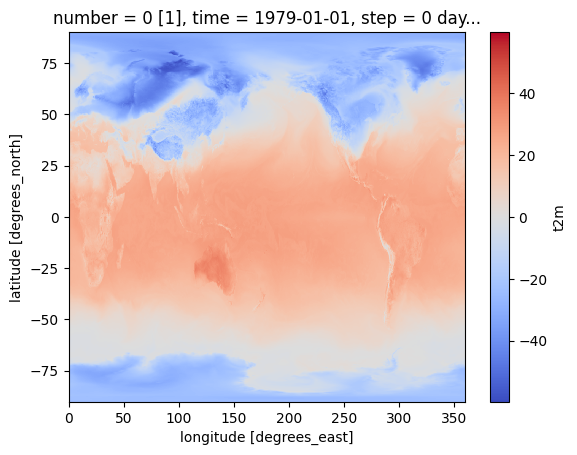

In [16]:
import matplotlib.pyplot as plt

ds -= 273.15
ds.t2m[0].plot(cmap = plt.cm.coolwarm)